In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from collections import defaultdict
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
# Load dataset.
tracks = pd.read_csv('data/fma_metadata/tracks_reduced_dataset.csv')
features_to_drop = ['Unnamed: 0']
tracks.drop(features_to_drop, inplace=True, axis=1)

In [3]:
tracks.head()

,track_id,album_date_released_year,artist_location,album_information,artist_bio,artist_website,album_tracks,album_title,track_genres,track_bit_rate,artist_name,artist_comments,album_date_created_day,album_date_released_day,album_tags,Attribution-Noncommercial-Share Alike 3.0 United States
0,2,2009,1275,1612,2004,2225,7,500,2355,256000,279,0,26,5,2285,0
1,3,2009,1275,1612,2004,2225,7,500,2355,256000,279,0,26,5,2285,0
2,5,2009,1275,1612,2004,2225,7,500,2355,256000,279,0,26,5,2285,0
3,10,2008,325,310,1623,1053,2,2119,713,192000,7052,3,26,6,2285,0
4,20,2009,498,10477,4679,5705,13,8103,4300,256000,9090,2,26,6,2285,0


In [4]:
X = tracks[['track_bit_rate']].values
y = tracks[['track_id']].values

# Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor

In [6]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [7]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [[0.17637785]]
Intercept: 
 [31899.48395863]


R2: 0.070
MSE: 1857396272.385
MAE: 37453.057


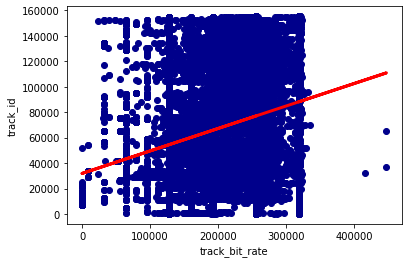

In [8]:
y_pred = reg.predict(X)

print('R2: %.3f' % r2_score(y, y_pred))
print('MSE: %.3f' % mean_squared_error(y, y_pred))
print('MAE: %.3f' % mean_absolute_error(y, y_pred))

fig1, ax1 = plt.subplots()
ax1.scatter(X, y,  color='darkblue')
ax1.plot(X, y_pred, color='red', linewidth=3)     #Dataframe.T fa il trasposto del df
ax1.set_xlabel('track_bit_rate')
ax1.set_ylabel('track_id')
plt.show()

In [9]:
reg = LinearRegression()
reg.fit(X.reshape(-1, 1), y)
y_pred = reg.predict(X.reshape(-1, 1))

print('R2: %.3f' % r2_score(y, y_pred))
print('MSE: %.3f' % mean_squared_error(y, y_pred))
print('MAE: %.3f' % mean_absolute_error(y, y_pred))

R2: 0.070
MSE: 1857396272.385
MAE: 37453.057


In [10]:
x_values = sorted([v for v in X])
y_values = y_pred[np.argsort(X)]

ValueError: x and y can be no greater than 2-D, but have shapes (99404, 1) and (99404, 1, 1)

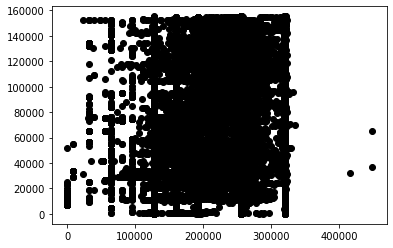

In [11]:
plt.scatter(X, y,  color='black')
plt.plot(x_values, y_values, color='blue', linewidth=3)
plt.show()

# LassoLarsCV

In [12]:
from sklearn.linear_model import LassoLarsCV
reg = LassoLarsCV()
reg.fit(X, y)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [0.17637785]
Intercept: 
 31899.483958627978


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2: 0.070
MSE: 1857396272.385
MAE: 37453.057


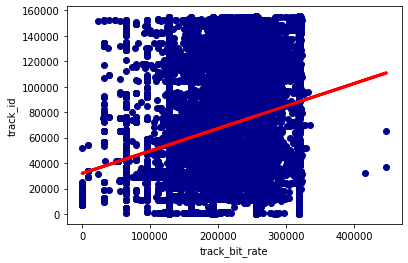

In [13]:
y_pred = reg.predict(X)

print('R2: %.3f' % r2_score(y, y_pred))
print('MSE: %.3f' % mean_squared_error(y, y_pred))
print('MAE: %.3f' % mean_absolute_error(y, y_pred))

fig1, ax1 = plt.subplots()
ax1.scatter(X, y,  color='darkblue')
ax1.plot(X, y_pred, color='red', linewidth=3)     #Dataframe.T fa il trasposto del df
ax1.set_xlabel('track_bit_rate')
ax1.set_ylabel('track_id')
plt.show()

# Ridge

In [14]:
reg = Ridge()
reg.fit(X, y)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [[0.17637785]]
Intercept: 
 [31899.48395863]


R2: 0.070
MSE: 1857396272.385
MAE: 37453.057


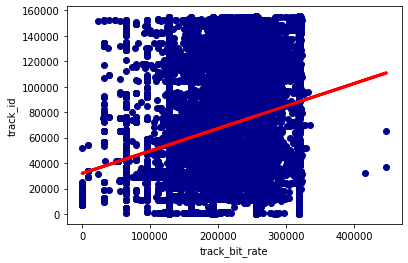

In [15]:
y_pred = reg.predict(X)

print('R2: %.3f' % r2_score(y, y_pred))
print('MSE: %.3f' % mean_squared_error(y, y_pred))
print('MAE: %.3f' % mean_absolute_error(y, y_pred))

fig1, ax1 = plt.subplots()
ax1.scatter(X, y,  color='darkblue')
ax1.plot(X, y_pred, color='red', linewidth=3)     #Dataframe.T fa il trasposto del df
ax1.set_xlabel('track_bit_rate')
ax1.set_ylabel('track_id')
plt.show()

# Huber

In [16]:
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.datasets import make_regression

In [17]:
reg = HuberRegressor().fit(X, y)
reg.fit(X, y)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [0.28420873]
Intercept: 
 1.7174210180442633e-06


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2: 0.038
MSE: 1921844962.504
MAE: 37470.562


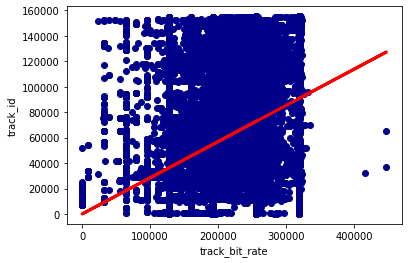

In [18]:
y_pred = reg.predict(X)

print('R2: %.3f' % r2_score(y, y_pred))
print('MSE: %.3f' % mean_squared_error(y, y_pred))
print('MAE: %.3f' % mean_absolute_error(y, y_pred))

fig1, ax1 = plt.subplots()
ax1.scatter(X, y,  color='darkblue')
ax1.plot(X, y_pred, color='red', linewidth=3)     #Dataframe.T fa il trasposto del df
ax1.set_xlabel('track_bit_rate')
ax1.set_ylabel('track_id')
plt.show()

# Theil

In [19]:
from sklearn.linear_model import TheilSenRegressor
from sklearn.datasets import make_regression

reg = TheilSenRegressor(random_state=0).fit(X, y)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Coefficients: 
 [0.28209627]
Intercept: 
 0.00896578982602003


R2: 0.037
MSE: 1923958737.174
MAE: 37472.554


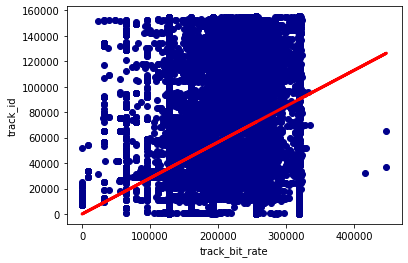

In [20]:
y_pred = reg.predict(X)

print('R2: %.3f' % r2_score(y, y_pred))
print('MSE: %.3f' % mean_squared_error(y, y_pred))
print('MAE: %.3f' % mean_absolute_error(y, y_pred))

fig1, ax1 = plt.subplots()
ax1.scatter(X, y,  color='darkblue')
ax1.plot(X, y_pred, color='red', linewidth=3)     #Dataframe.T fa il trasposto del df
ax1.set_xlabel('track_bit_rate')
ax1.set_ylabel('track_id')
plt.show()

# Bayesian Ridge

In [21]:
from sklearn.linear_model import BayesianRidge

reg = BayesianRidge().fit(X, y)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [0.17635442]
Intercept: 
 31905.666705781077


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2: 0.070
MSE: 1857396274.867
MAE: 37453.127


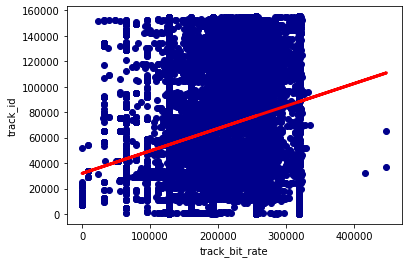

In [22]:
y_pred = reg.predict(X)

print('R2: %.3f' % r2_score(y, y_pred))
print('MSE: %.3f' % mean_squared_error(y, y_pred))
print('MAE: %.3f' % mean_absolute_error(y, y_pred))

fig1, ax1 = plt.subplots()
ax1.scatter(X, y,  color='darkblue')
ax1.plot(X, y_pred, color='red', linewidth=3)     #Dataframe.T fa il trasposto del df
ax1.set_xlabel('track_bit_rate')
ax1.set_ylabel('track_id')
plt.show()

R2: 0.096
MSE: 6343930161.586
MAE: 78438.880
Coefficients: 
 [ 1.59542313e-01 -1.88402464e+04]
Intercept: 
 39692.68570475129


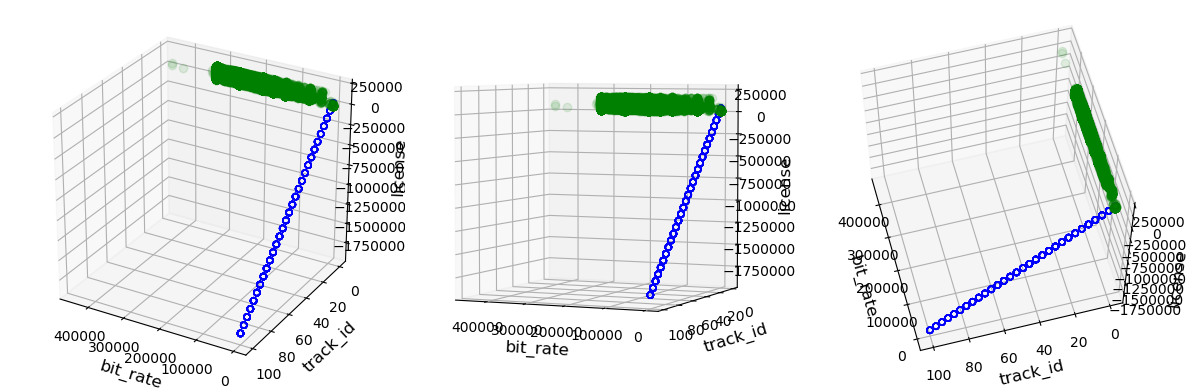

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

######################################## Data preparation #########################################


X = tracks[['track_bit_rate','Attribution-Noncommercial-Share Alike 3.0 United States']].values.reshape(-1,2)
Y = tracks['track_id']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace( 6,24,30)   # range of porosity values
y_pred = np.linspace(0,100,30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)
Y_pred = model.predict(X)
############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='green', zorder=15, linestyle='none', marker='o', alpha=0.1)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='blue')
    ax.set_xlabel('bit_rate', fontsize=12)
    ax.set_ylabel('track_id', fontsize=12)
    ax.set_zlabel('license', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, '',fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, '', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85,'', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

#fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()
print('R2: %.3f' % r2)
print('MSE: %.3f' % mean_squared_error(y, Y_pred))
print('MAE: %.3f' % mean_absolute_error(y, Y_pred))
print('Coefficients: \n', ols.coef_)
print('Intercept: \n', ols.intercept_)

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

######################################## Data preparation #########################################


X = tracks[['track_bit_rate','Attribution-Noncommercial-Share Alike 3.0 United States','album_date_released_day']].values.reshape(-1,2)
Y = tracks['track_id']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = X[:, 2]
v = Y

x_pred = np.linspace( 6,24,30)   # range of porosity values
y_pred = np.linspace(0,100,30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)
Y_pred = model.predict(X)
############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')
ax4 = fig.add_subplot(134, projection='3d')

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(x, y, z, v, color='green', zorder=15, linestyle='none', marker='o', alpha=0.1)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='blue')
    ax.set_xlabel('bit_rate', fontsize=12)
    ax.set_ylabel('track_id', fontsize=12)
    ax.set_zlabel('license', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, '',fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, '', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85,'', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

#fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()
print('R2: %.3f' % r2)
print('MSE: %.3f' % mean_squared_error(y, Y_pred))
print('MAE: %.3f' % mean_absolute_error(y, Y_pred))
print('Coefficients: \n', ols.coef_)
print('Intercept: \n', ols.intercept_)

IndexError: index 2 is out of bounds for axis 1 with size 2